
# PREDICCIÓN DE LA POSIBLE ADHESIÓN A UN PLAZO FIJO DE LOS CLIENTES DE UN BANCO

# INTRODUCCION

Nuestro cliente, una billetera virtual , está analizando ampliar la cartera de productos para sus clientes, así como para posibles prospectos. Entre sus alternativas se encuentra la de ofrecer depósitos a plazo fijo.
Con la intención de relevar la posible adhesión a este nuevo  producto, la institución ha realizado una campaña de marketing directo estableciendo contactos telefónicos con cada uno de sus clientes, con el fin de palpar la sensibilidad y aprovechar la oportunidad del contacto. Es importante remarcar que, en ocasiones, se requirió más de un contacto con el mismo cliente para entender si el cliente se suscribiría o no al plazo fijo.
Como resultado de la campaña se ha obtenido un dataset con un número de variables conteniendo distintos aspectos de la misma que, sumado a los datos de los clientes del banco, a algunos datos coyunturales y ciertos ratios económicos, nos han sido entregados para ser analizados. 
El objetivo final del estudio es predecir si un cliente es pasible de suscribirse a un plazo fijo. 
 

OBJETIVO:
Predecir el comportamiento de los clientes mediante la utilización de algoritmos de clasifiación, identificando las variables "Core" que determinan la propensión a la adhesión a un plazo fijo.  

CONTEXTO COMERCIAL:
Totalcoin es una billetera virtual creada en el 2010. Nace con la finalidad de ofrecer soluciones digitales para todos los que quieran mantener un control sobre sus pagos y cobros.
Entre los productos por lanzar para este año, se encuentrá la opción de plazos fijos para sus clientes. De manera de sondear la posible adhesión, ha realizado una campaña de Marketing Directo a través de contactos telefónicos.
Totalcoin nos ha contratado para analizar los resultados de la campaña.  

PROBLEMA COMERCIAL:
El problema es explorar los datos para poder responder a las siguientes preguntas:
¿Existen características en nuestos clientes que permitan determinar la propensión a un plazo fijo? ¿De que manera influye la campaña en la respuesta  del cliente?  

CONTEXTO ANALITICO: El departamento de marketing nos ha proporcionado una base de datos de los clientes que contiene información sobre varios atributos como edad, educación, trabajo, estado civil,  etc. y el resultado de la campaña de Marketing Directo. 

Estructuraremos el caso de la siguiente manera: En primer lugar vamos a realizar un análisis de datos exploratorio para investigar visualmente las características de los clientes; en segundo lugar analizaremos los datos de la campaña;  finalemnte utilizaremos los resultados obtenidos y observados para armar los modelos de clasificación y así poder concluir acerca de la existencia de caracteristicas que permitan identificar patrones comunes en los clientes con propensión a la adhesión de un plazo fijo .

IMPORTACIÓN DE LAS LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams
import matplotlib.pyplot as plt 
from seaborn import boxplot 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ADQUISICIÓN DE DATOS

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


*Se adjunta link de búsqueda y archivo txt del DS. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.*


In [ ]:
# Importamos el DataSet
%cd "/content/gdrive/MyDrive/CODERHOUSE_DESAFIOS"
ds3= pd.read_csv("bank-additional-full.csv",delimiter=";")
ds3

/content/gdrive/MyDrive/CODERHOUSE_DESAFIOS


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


*DESCRIPCIÓN DE VARIABLES*

VARIABLES INPUT:

 Datos de los clientes del banco:
 
•	age: edad del cliente  (variable numérica)

•	job : tipo de trabajo del cliente (variable categórica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

•	 marital: estado civil del cliente (variable categórica: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

•	Education: nivel de educación del cliente (variable categórica: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

•	default: si el cliente tiene un préstamo/crédito en default (variable categórica: 'no','yes','unknown')

•	housing: si el cliente posee crédito hipotecario (variable categórica: 'no','yes','unknown')

•	loan: si el cliente posee préstamo personal (variable categórica: 'no','yes','unknown')


 Datos relacionados con el último contacto de la actual campaña:

•	contact: tipo de contacto (variable categórica: 'cellular','telephone')

•	month: mes del último contacto (variable categórica: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

•	day_of_week: día de la semana del último contacto (variable categórica: 'mon','tue','wed','thu','fri')

•	duration: duración de la último contacto - en segundos  (variable numérica). Importante, este atributo afecta en gran medida el objetivo de salida (e.j., si la duración =0 entonces y='no'). Sin embargo la duración no se conoce antes de realizarse la llamada. Además, después de finalizar la llamada es obviamente conocido. Por este motivo, este input debe ser incluido solo con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista. 


 Otros atributos:

•	campaign: cantidad de contactos realizados durante la campaña para el cliente (variable numérica, incluye el último contacto)

•	pdays: cantidad de días desde que el cliente fue contactado por última vez en otra campaña (variable numérica; 999 significa que el cliente no fue contactado anteriormente)

•	previous: cantidad de contactos realizados previos a esta campaña para el cliente (variable numérica)

•	poutcome: resultado de la campaña anterior (variable categórica: 'failure','nonexistent','success')

 Atributos del contexto social y económico 

•	emp.var.rate: Tasa de variación de empleo – indicador trimestral (numérico)

•	cons.price.idx: Índice de precios al consumidor – indicador mensual (numérico)

•	cons.conf.idx: Índice de confianza del consumidor - indicador mensual (numérico)

•	euribor3m: tipo de interés aplicado a las operaciones entre bancos (tasa de 3 meses) – indicador diario (numérico)

•	nr.employed: Cantidad de empleados – indicador trimestral (numérico)



 VARIABLE OUTPUT (Target):

•	y – si el cliente se ha suscripto a un plazo fijo (variable binaria: 'yes','no')


# DATA WRANGLING

Para comenzar el análisis de los datos vamos a ver la estructura del dataset de manera de entender la cantidad de datos, la clase de variables con las que vamos a trabajar, la existencia de valores nulos o duplicados. 

In [ ]:
ds3.shape

(41188, 21)

El dataset obtenido posee 41.188 filas y 21 columnas, de las cuales 20 son variables independientes a analizar y 1 corresponde a la variable dependiente.  

Identificamos  las variables numéricas, las categóricas y verificamos si hay nulos.

In [ ]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
ds3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

El dataset no  posee datos nulos, posee once variables categóricas y diez numéricas.

In [ ]:
#!pip install missingno
import missingno as msno
msno.matrix(ds3)

Analizamos la existencia de duplicados.

In [ ]:
ds3.duplicated().value_counts()

False    41176
True        12
dtype: int64

El dataset posee 12 filas repetidas que procederemos a eliminar.

In [ ]:
dfsd = ds3.drop_duplicates().reset_index(drop=True)
dfsd.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Verificamos la eliminación de los valores duplicados.

In [ ]:
dfsd.duplicated().value_counts()

False    41176
dtype: int64

Una vez eliminadas las filas repetidas, el dataset queda con 41.176 filas y 21 columnas 

Realizamos un primer análisis de las variables para ver la cantidad de  categorías que poseen.

In [ ]:
dfsd["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [ ]:
dfsd["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
dfsd["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
dfsd["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
dfsd["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
dfsd["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
dfsd["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
dfsd["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
dfsd["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
dfsd["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
dfsd["duration"].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [ ]:
dfsd["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [ ]:
dfsd["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
dfsd["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
dfsd["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
dfsd["emp.var.rate"].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [ ]:
dfsd["cons.price.idx"].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [ ]:
dfsd["cons.conf.idx"].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
dfsd["euribor3m"].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [ ]:
dfsd["nr.employed"].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [ ]:
dfsd["y"].unique()

array(['no', 'yes'], dtype=object)

Vemos que de las variables categóricas, la variable educación tiene muchos niveles de educación básica, vamos a agruparlos en una única categoría "Basic".

In [ ]:
dfsd['education']=np.where(dfsd['education'] =='basic.9y', 'Basic', dfsd['education'])
dfsd['education']=np.where(dfsd['education'] =='basic.6y', 'Basic', dfsd['education'])
dfsd['education']=np.where(dfsd['education'] =='basic.4y', 'Basic', dfsd['education'])

In [ ]:
dfsd["education"].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

# ANÁLISIS EXPLORATORIO DE DATOS 

Realizamos un análisis de los principales indicadores estadísticos.

In [ ]:
dfsd.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


Analizamos la distribución de las adhesiones al plazo fijo preguntándonos, después de la campaña de marketing directo, ¿cuántos de nuestros clientes son propensos a adherirse a un plazo fijo?

In [ ]:
dfsd ["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [ ]:
yon = sns.countplot(x="y", data=dfsd)
yon.set_title("ADHESION AL PLAZO FIJO",  fontsize= 15)
yon.set_xlabel("Respuesta adhesión al plazo fijo ", fontsize= 12)
yon.set_ylabel("Cantidades ", fontsize= 12)
plt.gcf().set_size_inches(10, 5)
plt.grid(False)
yon.spines['right'].set_visible(False)
yon.spines['top'].set_visible(False)


Convertimos la variable target en numérica para sacar porcentajes

In [ ]:
# pasamos "y" de categórica a numérica
yin = pd.get_dummies(dfsd, columns =["y"] ,drop_first =True)
yin

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# volvemos a nombrar a la variable target "y"
xr_yn = yin.rename(columns={'y_yes': 'y'})
xr_yn

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Sacamos el porcentaje de cada categoría de la variables target, ¿cuál es el porcentaje de clientes propensos a adherirse a un plazo fijo?

In [ ]:
count_no_adh = len(xr_yn[xr_yn['y']==0])
count_adh = len(xr_yn[xr_yn['y']==1])
pct_no_adh = count_no_adh/(count_no_adh+count_adh)
print("El porcentage de no adhesión al plazo fijo es del", round(pct_no_adh*100), "% de los clientes,")
pct_adh = count_adh/(count_no_adh+count_adh)
print("mientras que el porcentage de adhesión al plazo fijo es del", round(pct_adh*100),"% de los clientes.")

El porcentage de no adhesión al plazo fijo es del 89 % de los clientes,
mientras que el porcentage de adhesión al plazo fijo es del 11 % de los clientes.


In [ ]:
import plotly.graph_objects as go 
colors=['blue','orange' ]
fig= go.Figure(data=[go.Pie(labels=['Adverso a adherirse a un Plazo Fijo','Propenso a adherirse a un Plazo Fijo'],
                            values=[89,11])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',pull=[0.1, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

Notamos que el dataset está fuertemente desbalanceado habiendo supremacía de los no adeptos a un plazo fijo.

Realizamos un análisis preliminar de las variables numéricas para entender algunas características de los adherentes al plazo fijo.

In [ ]:
xr_yn.groupby("y").mean().transpose()

y,0,1
age,39.910994,40.912266
duration,220.868079,553.256090
campaign,2.633385,2.051951
pdays,984.109396,791.990946
previous,0.132414,0.492779
emp.var.rate,0.248885,-1.233089
cons.price.idx,93.603798,93.354577
cons.conf.idx,-40.593232,-39.791119
euribor3m,3.811482,2.123362
nr.employed,5176.165690,5095.120069


La edad promedio de los clientes (age) que se adhieren al plazo fijo es de 41 años, siendo ésta apenas superior a la de los que no se adhieren.

La duración de las llamadas (duration) fue superior para los clientes que se adhirieron al plazo fijo. Puediendo entenderse por el interés en la información y los datos que tuvieran que brindar. Por otro lado, los que no se adhirieron pudieron demostrar desinterés a los pocos segundos de iniciada la llamada.

La cantidad de contactos durante la campaña (campaign) fue inferior en los no adherentes, pudiendose entender que la decisión se tomo en uno o dos llamados.

Respecto a la cantidad de días desde el último contacto resulta que los clientes que si se adhirieron tuvieron contacto más próximo así como fueron contactactados anteriormente (previous).



A priori las variables numéricas duration, campaign, pdays, previous, emp.var.rate, euriborn3m y nr.employed parecieran ser las que segmentan. 

### VISUALIZACIONES


Luego del análisis preliminar , llevamos a cabo un análisis visual para facilitar la comprensión de los datos.

1) Analizamos los datos de la cartera de clientes

1.1) Rangos etarios de los clientes del banco, ¿cómo esta compuesta la cartera de clientes en función de la edad?

In [ ]:
df_age=dfsd[['age','y']].groupby(by=['age']).count().reset_index()
df_age.head()

,age,y
0,17,5
1,18,28
2,19,42
3,20,65
4,21,102


In [ ]:
a= sns.barplot(data=df_age, x="age", y="y")
plt.gcf().set_size_inches(25, 10)
a.set_title("Composición de la cartera de clientes según la edad",  fontsize= 15)
a.set_xlabel("Edad", fontsize= 12)

Text(0.5, 41.0, 'Edad')

In [ ]:
xr_yn.age.hist( color = "skyblue" )
plt.title('RANGOS ETARIOS', fontsize= 15)
plt.xlabel('Edad', fontsize= 12)
plt.ylabel('Frecuencias', fontsize= 12)
plt.gcf().set_size_inches(15, 6)
plt.grid(True)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La mayoría de los clientes del banco están en el rango de 30-40 años.

Analizamos las adhesiones a plazo fijo en función de la edad ¿En qué franja etaria se concentran los clientes más propensos a adherirse a un plazo fijo? 

In [ ]:
p= sns.histplot(data=xr_yn, x="age", hue= "y")
plt.gcf().set_size_inches(25, 8)
p.set_title("ADHESIONES EN FUNCION DE LA EDAD",  fontsize= 15)
p.set_xlabel("Edad ", fontsize= 12)
plt.ylabel('Cantidad de adhesiones', fontsize= 12)
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<ipython-input-46-0272044d63f7>:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



En términos absolutos la mayor cantidad de adhesiones se encuentra en el rango de 30-40 años (existiendo una relación directa con la cantidad de clientes de esa franja etaria).

<ipython-input-47-cabe0365b45c>:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



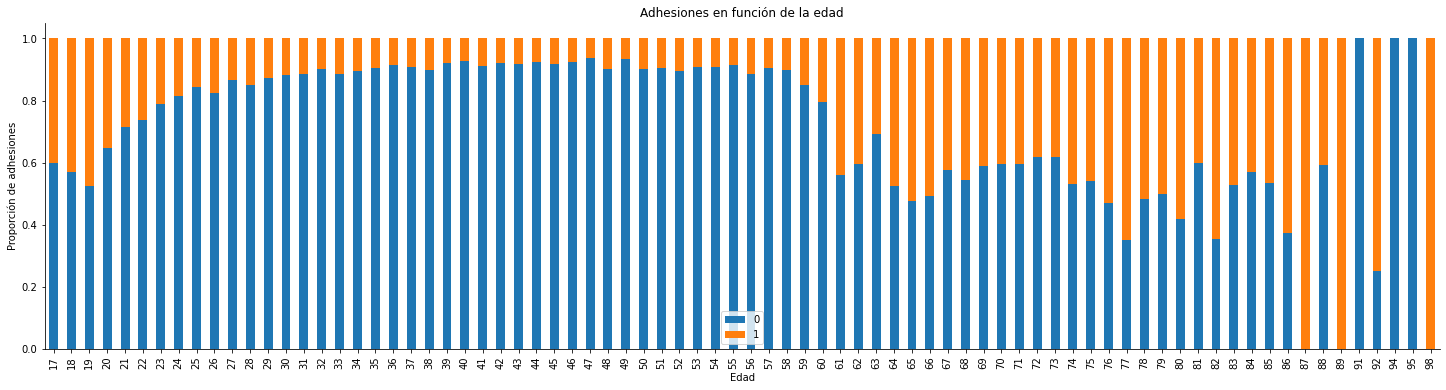

In [ ]:
%matplotlib inline
table=pd.crosstab(xr_yn.age,xr_yn.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(25, 6)
plt.title('Adhesiones en función de la edad')
plt.xlabel('Edad')
plt.ylabel('Proporción de adhesiones')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Si bien en términos absolutos la mayor cantidad de adhesiones se encuentra en el rango de 30-40 años (respondiendo al rango de  mayor cantidad de clientes), vemos que  en proporción, las adhesiones son mayores para los clientes de menos de 30 años y de más de 60 años.

1.2) Nivel de educación de los clientes del banco

In [ ]:
import plotly.graph_objects as go 
colors=['blue','green','black','purple','red','brown' ]
fig= go.Figure(data=[go.Pie(labels=['Basic','Unknown','University',
                                    'Profesional Course','Iliterate','High School'],
                            values=[30.4,4.2,29.5,12.7,0.0,23.1])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',title= "Distribución de los clientes según nivel de educación", titlefont_size=17, pull=[0.1, 0, 0.2, 0, 0, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))


Se puede observar que más del 60% de los clientes del banco (65,3%) está fuertemente instruida con nivel de educación secundaria o superior, de los cuales un 42,2% posee grado college o universitario completo.

Analizamos las adhesiones a plazo fijo en función de la educación

<ipython-input-49-d0b815da02ef>:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



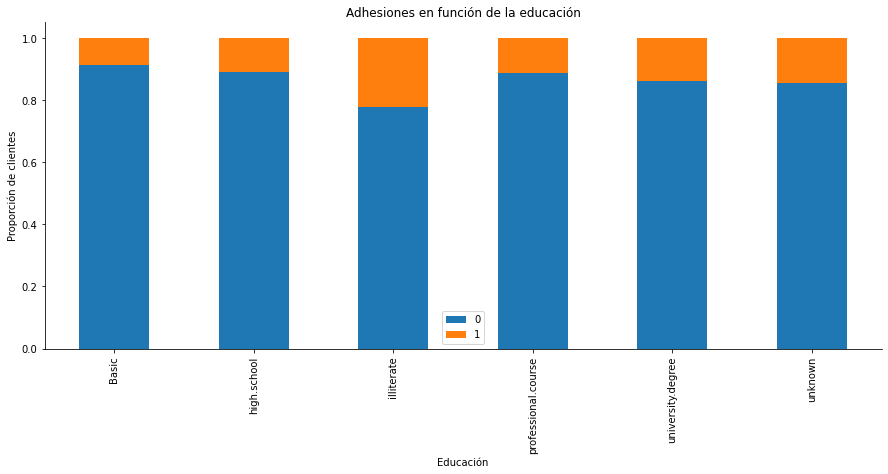

In [ ]:
table1=pd.crosstab(xr_yn.education,xr_yn.y)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función de la educación')
plt.xlabel('Educación')
plt.ylabel('Proporción de clientes')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La variable nivel de educación también puede ser de gran utilidad como variable predictora.

1.3) Ocupación de los clientes del banco

In [ ]:
colors=['blue','green','black','purple','red','brown', 'yellow', 'pink', 'skyblue', 'orange', 'grey', 'magenta']
fig= go.Figure(data=[go.Pie(labels=['Blue Collar','Administrative','Unknown', 'Unemployed', 'Technican', 'Student',
                                    'Services','Self Employed','Retired', 'Management', 'Housemaid', 'Entrepreneur'],
                            values=[22.5,25.3,0.8,2.5,16.4,2.1,9.6,3.5,4.2,7.1,2.6,3.5])])
fig.update_traces(hoverinfo='label+percent', textfont_size=10,
                  textinfo= 'label+percent',title= "Distribución de los clientes según ocupación", titlefont_size=17, pull=[0.2, 0.2, 0.0, 0.0, 0.1, 0.0,0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

En función de la ocupación, podemos ver que el 64% de la cartera se distribuye entre empleados administrativos, trabajadores de la industria y técnicos.

Analizamos las adhesiones a plazo fijo en función de la ocupación

<ipython-input-51-70334b36c47d>:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



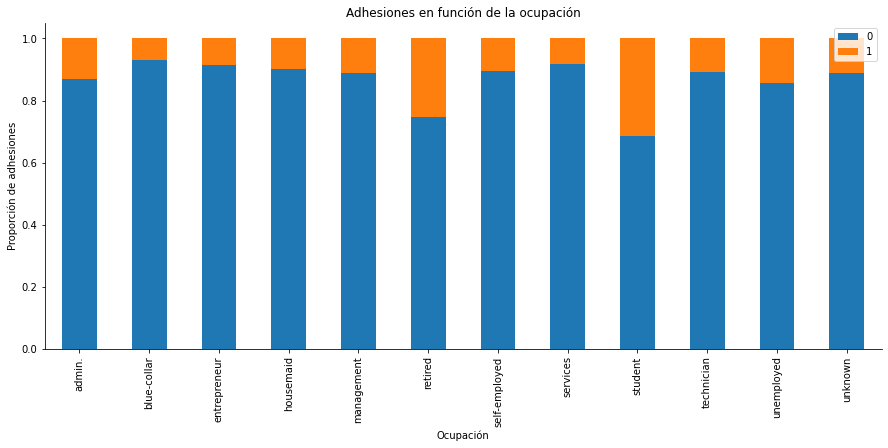

In [ ]:
%matplotlib inline
table0=pd.crosstab(xr_yn.job,xr_yn.y)
table0.div(table0.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función de la ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Proporción de adhesiones')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La propensión de adherirse a un plazo fijo depende en gran medida de la ocupación. Podemos decir que la ocupación puede ser una buena variable predictora.

1.4) Estado civil de los clientes del banco

In [ ]:
colors=['blue','green', "black",'red']
fig= go.Figure(data=[go.Pie(labels=['Married','Divorced','Unknown', 'Single'],
                            values=[60.5,11.2,0.2,28.1])])
fig.update_traces(hoverinfo='label+percent', textfont_size=12,
                  textinfo= 'label+percent',pull=[0.2, 0.2, 0.0, 0.0, 0.1, 0.0,0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

Más del 60% de los clientes del banco están casados.

Analizamos las adhesiones a plazo fijo en función del estado civil

<ipython-input-53-b0ab203e0cce>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



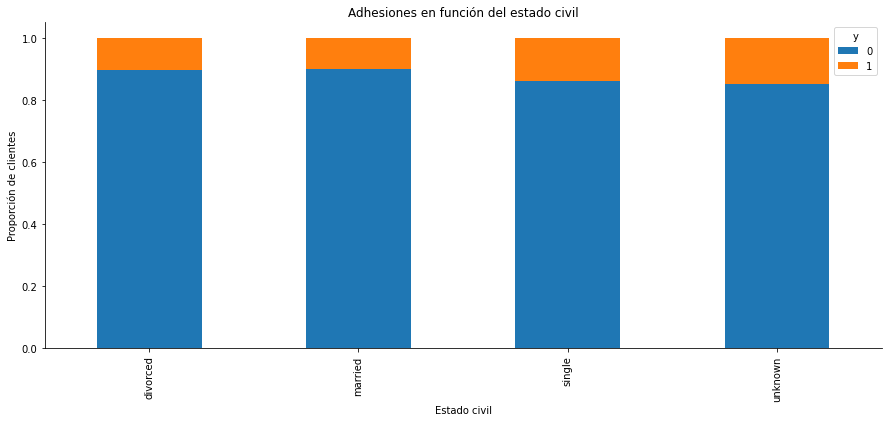

In [ ]:
table2=pd.crosstab(xr_yn.marital,xr_yn.y)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función del estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El estado civil de los clientes no sería determinante para definir la propensión o aversión a la adhesión a un Plazo Fijo.  

2) Analizamos algunos datos de la campaña de Marketing Directo

2.1) Adhesiones en función del tipo de contacto (teléfono fijo o celular) 

<ipython-input-54-acb495751453>:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



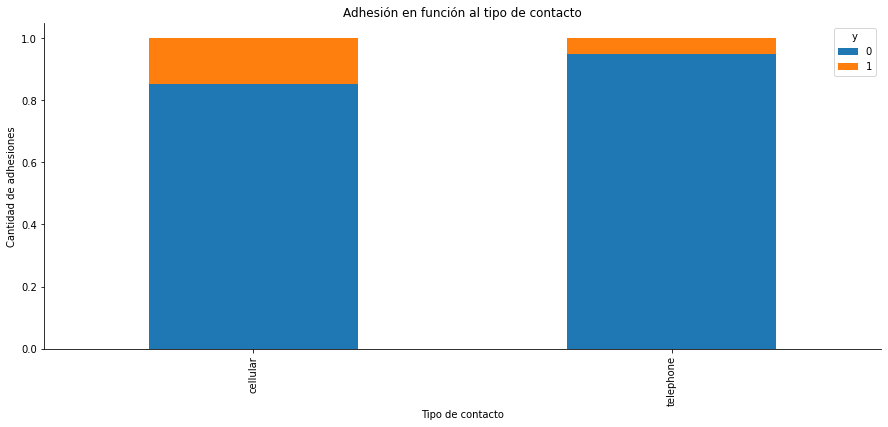

In [ ]:
table3= pd.crosstab(xr_yn.contact,xr_yn.y)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función al tipo de contacto')
plt.gcf().set_size_inches(15, 6)
plt.xlabel('Tipo de contacto')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El tipo de contacto podría ser una buena variable predictora.

2.2) Adhesiones en función del día de la semana en que se estableció  el contacto

<ipython-input-55-2e1428ed6917>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



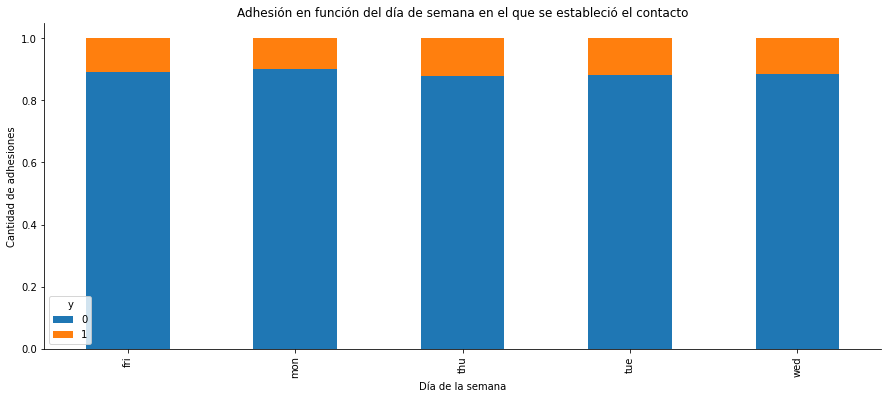

In [ ]:
table4= pd.crosstab(xr_yn.day_of_week,xr_yn.y)
table4.div(table4.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del día de semana en el que se estableció el contacto')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


El día de la semana no pareciera ser una variable predictora.

2.3) Adhesiones en función del mes en el que se estableció el contacto 

<ipython-input-56-8b24a8551ef7>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



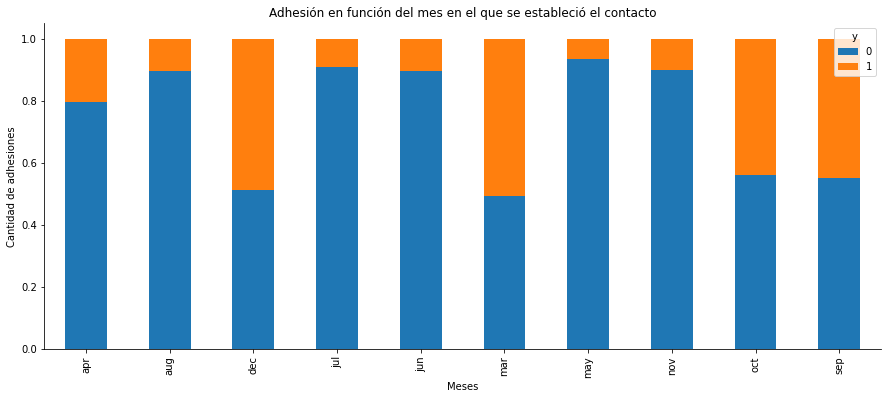

In [ ]:
table5= pd.crosstab(xr_yn.month,xr_yn.y)
table5.div(table5.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del mes en el que se estableció el contacto')
plt.xlabel('Meses')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


El mes de contacto pareciera ser una variable predictora.

2.4) Adhesiones en función de la cantidad de llamadas de la última campaña

In [ ]:
# Llamadas por cliente campaña actual 
sorted_num_campaing=sorted(xr_yn.campaign.unique())
print(sorted_num_campaing)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]


<ipython-input-58-25e92e0f491f>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



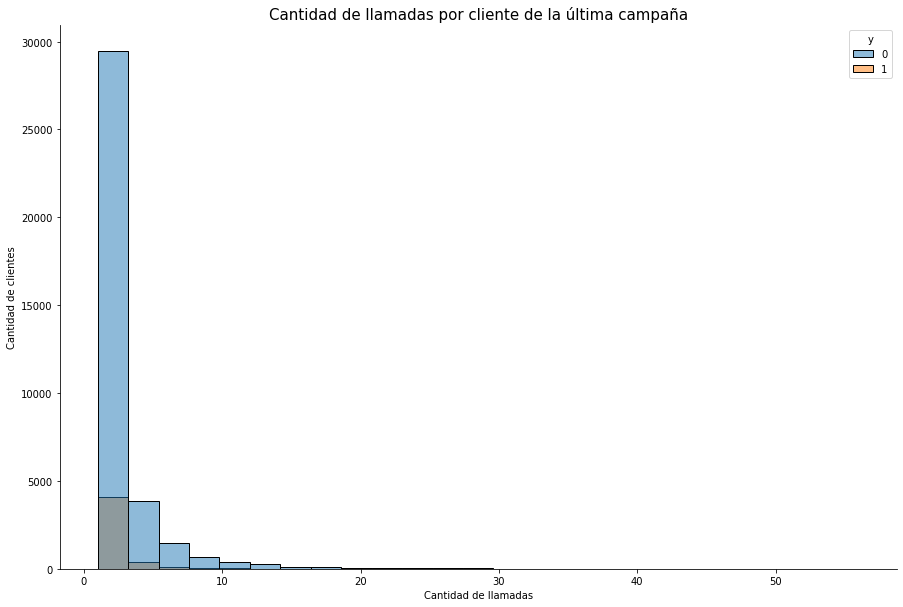

In [ ]:
# Cantidad de llamadas por cliente
v= sns.histplot(data=xr_yn, x="campaign", hue="y", bins=25)
v.set_title("Cantidad de llamadas por cliente de la última campaña",  fontsize= 15)
plt.gcf().set_size_inches(15, 10)
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de clientes')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Más de la mitad de los clientes fueron contactados una sola vez durante esta campaña y fue en este llamado (en la mayoría de los casos) en el que se concretó la adhesión.
Cantidad de llamados parece ser una buena variable predictora.

2.5) Adhesiones en función del resultado de campañas anteriores 

In [ ]:
# Contactos por cliente campañas anteriores
xr_yn.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df_previous=xr_yn[['previous',"poutcome"]].groupby(by=[ "poutcome"]).count().reset_index()
df_previous

,poutcome,previous
0,failure,4252
1,nonexistent,35551
2,success,1373


<ipython-input-61-be2036da5bed>:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



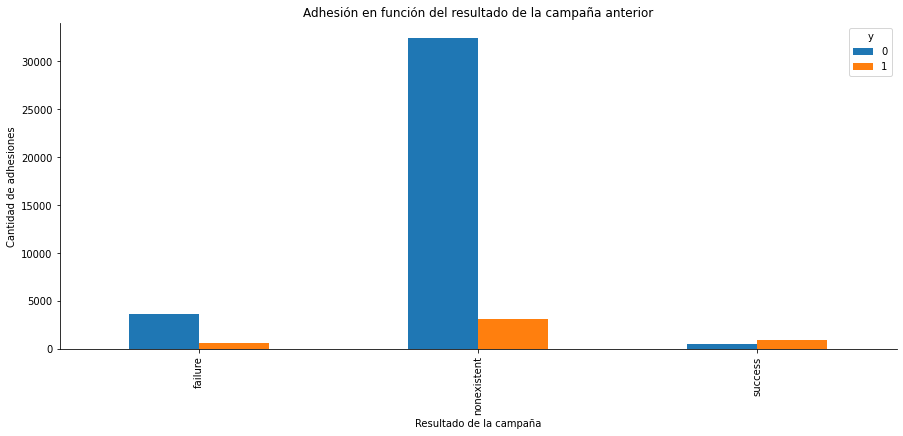

In [ ]:
pd.crosstab(xr_yn.poutcome,xr_yn.y).plot(kind='bar')
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del resultado de la campaña anterior')
plt.xlabel('Resultado de la campaña')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El resultado de campañas anteriores parace ser un buen predictor de la variable target.

# INGENIERIA DE ATRIBUTOS

Una vez analizado el contexto y teniendo una visión preliminar, nos metemos de lleno en las variables para seleccionar aquellas que vamos a utilizar. Realizamos algunas transformaciones y escogemos aquellas variables que utilizaremos en cada modelo de Machine Learning.  

### DEPENDENCIA VARIABLES NUMERICAS VS NUMERICAS

En primer lugar analizamos la existencia de correlación entre las variables numéricas de manera de reducir, de ser posible, el número de variables.

In [ ]:
dfsd.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


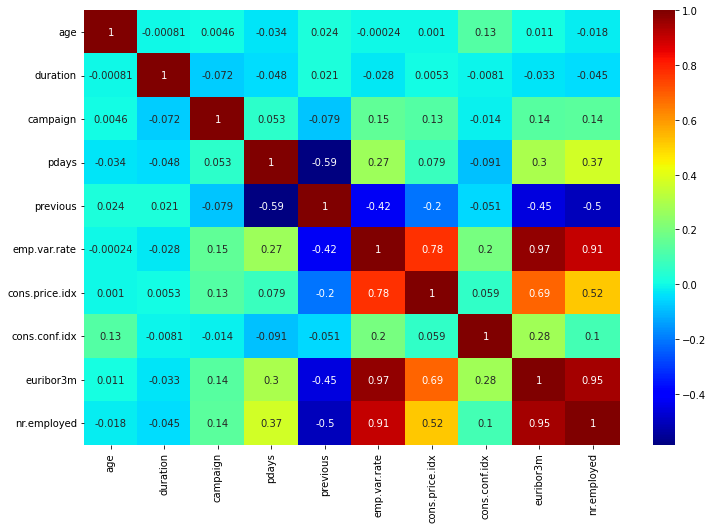

In [ ]:
plt.figure(figsize=(12, 8))
dfsd_corr = dfsd.corr()
sns.heatmap(dfsd_corr, 
            xticklabels = dfsd_corr.columns.values,
            yticklabels = dfsd_corr.columns.values,
            annot = True,cmap='jet');

Vemos que hay fuerte correlación de las variables nr.employed y emp.var.rate; euroborn3m y nr.employed; empl.var.rate y euroborn3m; emp.var.rate y cons.price.idx; euroborn3m y cons.price.idx

Una vez identificadas las variables con fuerte correlación, procedemos a analizar la significancia.

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = dfsd.corr()
rho

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [ ]:
pval = dfsd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) 
pval

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,0.000000e+00,8.697018e-01,3.483594e-01,2.986015e-12,7.517413e-07,9.608190e-01,8.377105e-01,1.870449e-152,2.766728e-02,3.528419e-04
duration,8.697018e-01,0.000000e+00,3.723691e-48,4.671824e-22,2.909110e-05,1.422242e-08,2.819418e-01,9.917412e-02,2.564613e-11,1.201444e-19
campaign,3.483594e-01,3.723691e-48,0.000000e+00,1.238346e-26,2.890409e-58,6.122045e-208,1.555315e-149,5.584170e-03,3.961710e-167,5.639339e-190
pdays,2.986015e-12,4.671824e-22,1.238346e-26,0.000000e+00,0.000000e+00,0.000000e+00,6.839422e-58,4.682707e-77,0.000000e+00,0.000000e+00
previous,7.517413e-07,2.909110e-05,2.890409e-58,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.609259e-25,0.000000e+00,0.000000e+00
emp.var.rate,9.608190e-01,1.422242e-08,6.122045e-208,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cons.price.idx,8.377105e-01,2.819418e-01,1.555315e-149,6.839422e-58,0.000000e+00,0.000000e+00,0.000000e+00,2.896629e-33,0.000000e+00,0.000000e+00
cons.conf.idx,1.870449e-152,9.917412e-02,5.584170e-03,4.682707e-77,4.609259e-25,0.000000e+00,2.896629e-33,0.000000e+00,0.000000e+00,3.177248e-93
euribor3m,2.766728e-02,2.564613e-11,3.961710e-167,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nr.employed,3.528419e-04,1.201444e-19,5.639339e-190,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.177248e-93,0.000000e+00,0.000000e+00


In [ ]:
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05 ] if x<=t]))
rho.round(2).astype(str) + p

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0**,-0.0,0.0,-0.03**,0.02**,-0.0,0.0,0.13**,0.01*,-0.02**
duration,-0.0,1.0**,-0.07**,-0.05**,0.02**,-0.03**,0.01,-0.01,-0.03**,-0.04**
campaign,0.0,-0.07**,1.0**,0.05**,-0.08**,0.15**,0.13**,-0.01**,0.14**,0.14**
pdays,-0.03**,-0.05**,0.05**,1.0**,-0.59**,0.27**,0.08**,-0.09**,0.3**,0.37**
previous,0.02**,0.02**,-0.08**,-0.59**,1.0**,-0.42**,-0.2**,-0.05**,-0.45**,-0.5**
emp.var.rate,-0.0,-0.03**,0.15**,0.27**,-0.42**,1.0**,0.78**,0.2**,0.97**,0.91**
cons.price.idx,0.0,0.01,0.13**,0.08**,-0.2**,0.78**,1.0**,0.06**,0.69**,0.52**
cons.conf.idx,0.13**,-0.01,-0.01**,-0.09**,-0.05**,0.2**,0.06**,1.0**,0.28**,0.1**
euribor3m,0.01*,-0.03**,0.14**,0.3**,-0.45**,0.97**,0.69**,0.28**,1.0**,0.95**
nr.employed,-0.02**,-0.04**,0.14**,0.37**,-0.5**,0.91**,0.52**,0.1**,0.95**,1.0**


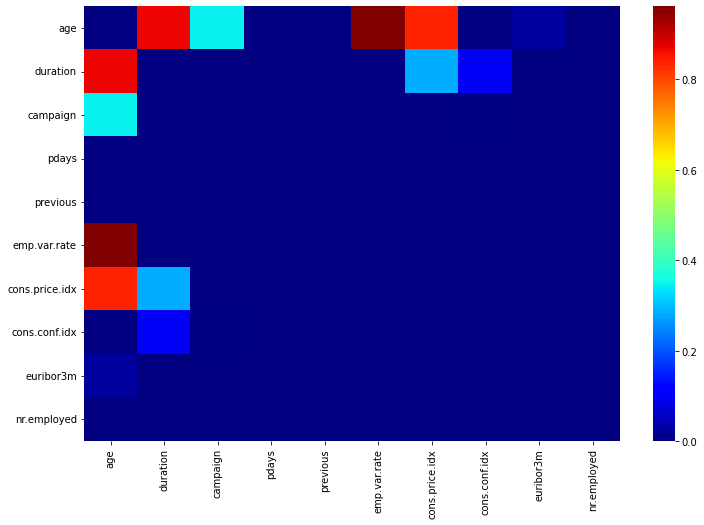

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

La alta significancia (p valor pequeño) nos permite quedarnos con una sola de estas variables que tienen alta correlación. Nos quedamos con la variable euribor3m y descartamos las variables cons.price.idx, emp.var.rate   y nr.employed.

###DEPENDENCIA DE VARIABLES CATEGÓRICAS VS CATEGÓRICAS

Procedemos a analizar la dependencia de las variables categóricas entre ellas.

 ANALIZAMOS LAS VARIABLES "EDUCATION" Y "JOB"

In [ ]:
t=pd.crosstab(dfsd.education, dfsd.job)
t

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
Basic,727,7366,418,645,351,817,338,746,138,529,332,105
high.school,3329,878,234,174,298,276,118,2680,357,872,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3317,142,12
university.degree,5750,94,610,139,2063,284,765,173,170,1809,262,45
unknown,249,454,57,42,123,97,29,150,167,212,19,131


In [ ]:
pd.crosstab(dfsd.education, dfsd.job, normalize=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
Basic,0.017656,0.178891,0.010152,0.015664,0.008524,0.019842,0.008209,0.018117,0.003351,0.012847,0.008063,0.002550
high.school,0.080848,0.021323,0.005683,0.004226,0.007237,0.006703,0.002866,0.065086,0.008670,0.021177,0.006290,0.000899
illiterate,0.000024,0.000194,0.000049,0.000024,0.000000,0.000073,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000
professional.course,0.008816,0.011002,0.003279,0.001433,0.002161,0.005853,0.004080,0.005294,0.001044,0.080557,0.003449,0.000291
university.degree,0.139644,0.002283,0.014814,0.003376,0.050102,0.006897,0.018579,0.004201,0.004129,0.043933,0.006363,0.001093
unknown,0.006047,0.011026,0.001384,0.001020,0.002987,0.002356,0.000704,0.003643,0.004056,0.005149,0.000461,0.003181


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

35177.86332033026
0.0
55


**Ho: Education y Job son independientes**

**Ha: Education y Job son dependientes**

El p valor de 0.0 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre las variables Education y Job.

In [ ]:
# Con el coeficiente de Cramer analizamos la intencidad de la dependencia
obs = np.sum(t).sum() 
mini = min(t.shape)-1 
c/(obs*mini)

0.1708658603085791

La intensidad de la dependencia no es fuerte como para eliminarla.

ANALIZAMOS LAS VARIABLES DAY_OF_WEEK Y MONTH

In [ ]:
t=pd.crosstab(dfsd.day_of_week, dfsd.month)
t

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
day_of_week,,,,,,,,,,
fri,610,1070,24,1012,1147,94,2857,755,142,115
mon,702,1221,53,1515,1251,143,2642,766,129,90
thu,768,1347,45,1668,967,99,2536,903,163,122
tue,251,1295,25,1517,970,140,2809,813,148,118
wed,300,1243,35,1457,983,70,2923,863,135,125


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

766.2452583968036
9.93772274269629e-138
36


**Ho: day of week y month son independientes**

**Ha: day of week y month son dependientes**

El p valor de 0.0 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre las variables day of week y month.

In [ ]:
# Con el coeficiente de Cramer analizamos la intencidad de la dependencia
obs = np.sum(t).sum() 
mini = min(t.shape)-1 
c/(obs*mini)

0.004652256523198001

La intensidad de la dependencia es muy pequeña como para eliminarla.

ANALIZAMOS LAS VARIABLES "LOAN" Y "HOUSING"

In [ ]:
t=pd.crosstab(dfsd.loan, dfsd.housing)
t

housing,no,unknown,yes
loan,,,
no,16058,0,17880
unknown,0,990,0
yes,2557,0,3691


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

41264.80164362559
0.0
4


**Ho: Loan y Housing son independientes**

**Ha: Loan y Housing son dependientes**

El p valor de 0.0 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre las variables Loan y Housing.

In [ ]:
# Con el coeficiente de Cramer analizamos la intencidad de la dependencia
obs = np.sum(t).sum() 
mini = min(t.shape)-1 
c/(obs*mini)

0.5010783179962307

La intensidad de la dependencia es media pero por rondar el 50% en principio decidimos no eliminarla.

ANALIZAMOS LAS VARIABLES "LOAN" Y "DEFAULT"

In [ ]:
t=pd.crosstab(dfsd.loan, dfsd.default)
t

default,no,unknown,yes
loan,,,
no,26838,7097,3
unknown,763,227,0
yes,4976,1272,0


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

4.208523734396529
0.37852017538302996
4


**Ho: Loan y Default son independientes**

**Ha: Loan y Default son dependientes**

El p valor de 0.378 indica que no podemos rechazar la HO. 
Luego entonces hay independencia entre las variables Loan y Default.

ANALIZAMOS LAS VARIABLES "CONTACT" Y "POUTCOME"

In [ ]:
t=pd.crosstab(dfsd.contact, dfsd.poutcome)
t

poutcome,failure,nonexistent,success
contact,,,
cellular,3952,20913,1270
telephone,300,14638,103


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

2423.002136130274
0.0
2


**Ho: Contact y Poutcome son independientes**

**Ha: Contact y Poutcome son dependientes**

El p valor de 0.0 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre las variables Contact y Poutcome.

In [ ]:
# Con el coeficiente de Cramer analizamos la intencidad de la dependencia
obs = np.sum(t).sum() 
mini = min(t.shape)-1 
c/(obs*mini)

0.058845010106136436

La intensidad de la dependencia no es fuerte como para eliminarla.

### ESTANDARIZACIÓN DE VARIABLES

Definimos el nuevo dataset de variables numéricas, una vez eliminadas aquellas con alta correlación.

In [ ]:
A= xr_yn[['duration', "campaign", "pdays", "previous",  "euribor3m","cons.conf.idx"  ]]
A

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx
0,261,1,999,0,4.857,-36.4
1,149,1,999,0,4.857,-36.4
2,226,1,999,0,4.857,-36.4
3,151,1,999,0,4.857,-36.4
4,307,1,999,0,4.857,-36.4
...,...,...,...,...,...,...
41171,334,1,999,0,1.028,-50.8
41172,383,1,999,0,1.028,-50.8
41173,189,2,999,0,1.028,-50.8
41174,442,1,999,0,1.028,-50.8


Estandarizamos las variables numéricas.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
A = scaler.fit_transform(A)
A

array([[ 0.01035157, -0.56596326,  0.19544346, -0.34955143,  0.71246263,
         0.88656813],
       [-0.42157694, -0.56596326,  0.19544346, -0.34955143,  0.71246263,
         0.88656813],
       [-0.12462609, -0.56596326,  0.19544346, -0.34955143,  0.71246263,
         0.88656813],
       ...,
       [-0.26731675, -0.20498953,  0.19544346, -0.34955143, -1.49519696,
        -2.22505906],
       [ 0.70837889, -0.56596326,  0.19544346, -0.34955143, -1.49519696,
        -2.22505906],
       [-0.07449153,  0.1559842 ,  0.19544346,  1.6708205 , -1.49519696,
        -2.22505906]])

In [ ]:
#Armaos dataframe con nombres de las columnas 
A = pd.DataFrame(A, columns=['duration', "campaign", "pdays", "previous",  "euribor3m","cons.conf.idx"])
A.head()

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568


Para poder aplicar los modelos de Machine Learning, transformamos las variables categóricas aplicando la codificación One Hot Encoding. 

In [ ]:
B = pd.get_dummies(xr_yn [['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'] ],drop_first =True)

In [ ]:
B

,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41172,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41173,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41174,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


Unimos todas las variables en un único dataframe.

In [ ]:
X_n=pd.concat([A,B], axis=1)
X_n.head()

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_n.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'euribor3m',
       'cons.conf.idx', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Vemos que al pasar de variables categóricas a numéricas se incrementó el número  de variables independientes pasando de 18 a 47.

In [ ]:
X = X_n.drop("y",1)      
y = X_n['y']   

<ipython-input-90-d47fc781ac53>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
X

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41172,0.480845,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41173,-0.267317,-0.204990,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41174,0.708379,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


###LIMPIEZA DE OUTLIERS

Con Isolation Forest identificamos los outliers del dataset, establecemos un umbral de contaminación de 0,05.

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) 
K =iso.fit_predict(X)
K

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



array([1, 1, 1, ..., 1, 1, 1])

Creamos una columna con los valores de los outliers

In [ ]:
X_n["outliers"] = K

In [ ]:
X_n

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,outliers
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
41172,0.480845,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
41173,-0.267317,-0.204990,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
41174,0.708379,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Eliminamos las filas cuyo valor en la columna "outliers" es  -1

In [ ]:
X_no = X_n.loc[X_n["outliers"] != -1, :]
X_no

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,outliers
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
41172,0.480845,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
41173,-0.267317,-0.204990,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
41174,0.708379,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Se eliminaron 4.118 filas.

Eliminamos la columna "outliers" ya que fue creada solo para identificar los mismos y no tiene sentido que el modelo la contemple como una variable.

In [ ]:
X_nos = X_no.drop("outliers",1)      

<ipython-input-96-670b35c6f5fc>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Finalmente nos queda el dataset sin los outliers.

In [ ]:
X_nos

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41172,0.480845,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
41173,-0.267317,-0.204990,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41174,0.708379,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


###SELECCION DE VARIABLES (FEATURE SELECTION)

Como el pasaje de variables categóricas a numéricas incrementó el número de variables, vamos a utilizar el método wrapper "Forward Selection" para identificar la mínima cantidad de variables que permitan clasificar si un cliente es propenso o adverso a la adhesión a un plazo fijo. 

In [ ]:
#!pip uninstall statsmodels

In [ ]:
#!pip install statsmodels

In [ ]:
import statsmodels.api as sm 

In [ ]:

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

Definimos las variables "X" y la variable "y"

In [ ]:
X = X_nos.drop("y",1)      
y = X_nos['y']   

<ipython-input-102-ac939854ab46>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
X

,duration,campaign,pdays,previous,euribor3m,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.010352,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,-0.421577,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.124626,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.413864,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.187751,-0.565963,0.195443,-0.349551,0.712463,0.886568,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41172,0.480845,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41173,-0.267317,-0.204990,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41174,0.708379,-0.565963,0.195443,-0.349551,-1.495197,-2.225059,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
forward_selection(data=X,target=y,significance_level=0.01)

<ipython-input-101-79271acff42d>:6: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/p

['duration',
 'euribor3m',
 'month_may',
 'cons.conf.idx',
 'month_mar',
 'pdays',
 'month_aug',
 'poutcome_nonexistent',
 'month_nov',
 'job_blue-collar',
 'month_oct',
 'job_student',
 'job_retired',
 'default_unknown',
 'poutcome_success',
 'education_university.degree',
 'day_of_week_mon',
 'month_jul',
 'month_jun',
 'month_dec']

Vemos que luego del Forward Selection la cantidad de variables independientes bajó pasando de 47 a 19.

Definimos un nuevo dataset con los varlores que arrojó el Forward Selection.

In [ ]:
Xn_nos = X_nos.loc[:,['duration', 'euribor3m', 'month_may', 'cons.conf.idx', 'month_mar','month_aug','poutcome_nonexistent',
                      'month_nov', 'job_blue-collar','month_oct','job_retired','default_unknown','job_student',   
                      'education_university.degree','pdays','month_jul','month_jun',
                      'month_dec', 'day_of_week_mon', 'y']]
Xn_nos

,duration,euribor3m,month_may,cons.conf.idx,month_mar,month_aug,poutcome_nonexistent,month_nov,job_blue-collar,month_oct,job_retired,default_unknown,job_student,education_university.degree,pdays,month_jul,month_jun,month_dec,day_of_week_mon,y
0,0.010352,0.712463,1,0.886568,0,0,1,0,0,0,0,0,0,0,0.195443,0,0,0,1,0
1,-0.421577,0.712463,1,0.886568,0,0,1,0,0,0,0,1,0,0,0.195443,0,0,0,1,0
2,-0.124626,0.712463,1,0.886568,0,0,1,0,0,0,0,0,0,0,0.195443,0,0,0,1,0
3,-0.413864,0.712463,1,0.886568,0,0,1,0,0,0,0,0,0,0,0.195443,0,0,0,1,0
4,0.187751,0.712463,1,0.886568,0,0,1,0,0,0,0,0,0,0,0.195443,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.291876,-1.495197,0,-2.225059,0,0,1,1,0,0,1,0,0,0,0.195443,0,0,0,0,1
41172,0.480845,-1.495197,0,-2.225059,0,0,1,1,1,0,0,0,0,0,0.195443,0,0,0,0,0
41173,-0.267317,-1.495197,0,-2.225059,0,0,1,1,0,0,1,0,0,1,0.195443,0,0,0,0,0
41174,0.708379,-1.495197,0,-2.225059,0,0,1,1,0,0,0,0,0,0,0.195443,0,0,0,0,1


In [ ]:
X = Xn_nos .drop("y", 1)      
y = Xn_nos ['y']  

<ipython-input-106-3158622e6bed>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



# ENTRENAMIENTO Y TESTEO

Los modelos urilizados para predecir la adhesión a un plazo fijo fueron:
- Random Forest
- XGBoost


En un primer momento se testearon los modelos con el dataset resultante, una vez completada la etapa de "Ingeniería de Atributos", tomando una división de Train/Test con una relación de 80/20.

### RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((31293, 19), (7824, 19))

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=50,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
y_pred= clf.predict(X_test)

Evaluamos la métrica accuracy del modelo con una validación simple.

In [ ]:
accuracy_score(y_test,y_pred)
print('La precisión global del modelo Random Forest es de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

La precisión global del modelo Random Forest es de: 0.9213


Modificamos el entorno del algoritmo Random Forest con "Cross Validation" para ver si también nos da buenos resultados de accuracy. 

In [ ]:
X = Xn_nos.iloc[:,:-1].values
y = Xn_nos.iloc[:,-1].values

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [ ]:
train, test = list(skf.split(X, y))[0]
train

array([    1,     2,     3, ..., 39113, 39115, 39116])

In [ ]:
test

array([    0,     4,    16, ..., 39110, 39112, 39114])

In [ ]:
X[test]

array([[ 0.01035157,  0.71246263,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.18775078,  0.71246263,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2070333 ,  0.71246263,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.01664396, -1.49519696,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2918764 , -1.49519696,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26731675, -1.49519696,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=42,n_estimators=50, criterion="gini",max_depth=10)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.9220347648261759
Iteracion:  2  Accuracy: 0.9224182004089979
Iteracion:  3  Accuracy: 0.9210021730793813
Iteracion:  4  Accuracy: 0.9172951553112617
Iteracion:  5  Accuracy: 0.9220247986705867
Accuracy promedio: 0.9209550184592807


Vemos que tanto en la validación simple como utilizando el Cross Validation la métrica accuracy es similar, teniendo la mejor performance en la segunda iteración del Cross Validation.

Obtenemos el Classification report del Random Forest con todas las métricas.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=pred, y_true= y_test_n))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7098
           1       0.63      0.39      0.48       725

    accuracy                           0.92      7823
   macro avg       0.78      0.68      0.72      7823
weighted avg       0.91      0.92      0.91      7823



###XGBOOST

In [ ]:
#!pip install xgboost!

In [ ]:
import xgboost as xgb 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            n_estimators=40,seed=42,max_depth=6, learning_rate=0.01,verbosity=2)

In [ ]:
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[22:11:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 e

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=40, seed=42,
              verbosity=2)

In [ ]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

Evaluamos la métrica accuracy del modelo con una validación simple.

In [ ]:
accuracy_score(y_test,y_pred)
print('La precisión global del modelo XGBoost es de: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

La precisión global del modelo XGBoost es de: 0.9211


Al igual que para el Random Forest, modificamos el entorno del algoritmo XGBoost con "Cross Validation" para ver si también nos da buenos resultados de accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = xgb.XGBClassifier(objective='binary:logistic', 
                            n_estimators=40,seed=42,max_depth=6, learning_rate=0.01,verbosity=2)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[22:11:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 e

Analizando el resultado de la validación 
simple como utilizando el Cross Validation la métrica accuracy es levemente superior en el Cross Validation, teniendo la mejor performance en la tercera iteración.

Obtenemos el Classification report del XGBoost con todas las métricas.

In [ ]:
print(classification_report(y_pred=pred, y_true= y_test_n))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7098
           1       0.63      0.43      0.51       725

    accuracy                           0.92      7823
   macro avg       0.79      0.70      0.74      7823
weighted avg       0.92      0.92      0.92      7823



# OPTIMIZACION DEL MODELO

Luego de analizar ambos algoritmos, vemos que si bien arrojan buenos resultados de accuracy, el resto de las métricas podrían mejorar.
Se aplicó la técnica de Oversampling SMOTE, de manera de compensar el desbalance de la variable target. Se elaboró una división entre Test/Train con el mismo porcentaje que se había utilizado anteriormente para ambos modelos, con la diferencia que ahora la cantidad de positivos y
negativos en la variable target es la misma.

###SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(k_neighbors=3)
y = Xn_nos ['y']  
X = Xn_nos .drop("y", 1)    
x_smote, y_smote = smote.fit_resample(X, y)
print('Dataset original shape', Counter(y))
print('Dataset modificado shape', Counter(y_smote))

<ipython-input-128-d0b9b2ada8f3>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Dataset original shape Counter({0: 35493, 1: 3624})
Dataset modificado shape Counter({0: 35493, 1: 35493})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((56788, 19), (14198, 19))

##RANDOM FOREST

In [ ]:
clf2 = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=50,criterion='gini')
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
y_pred= clf2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report( y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7090
           1       0.86      0.96      0.91      7108

    accuracy                           0.90     14198
   macro avg       0.91      0.90      0.90     14198
weighted avg       0.91      0.90      0.90     14198



###XGBOOST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote,  test_size=0.20, random_state=123)

In [ ]:
clf_xgb2 = xgb.XGBClassifier(objective='binary:logistic', 
                            n_estimators=40,seed=42,max_depth=6, learning_rate=0.01,verbosity=2)

In [ ]:
clf_xgb2.fit(X_train,y_train) #Entrenamos el modelo

[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:21:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 e

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=40, seed=42,
              verbosity=2)

In [ ]:
y_train_predXGB = clf_xgb2.predict(X_train) #Prediccion en Train
y_test_predXGB = clf_xgb2.predict(X_test) #Prediccion en Test

# SELECCION DEL MODELO 

Analizamos las métricas que arrojó el Classification Report para cada modelo:

Random Forest

In [ ]:
print(classification_report( y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7090
           1       0.86      0.96      0.91      7108

    accuracy                           0.90     14198
   macro avg       0.91      0.90      0.90     14198
weighted avg       0.91      0.90      0.90     14198



XGBoost

In [ ]:
print(classification_report(y_pred=y_test_predXGB, y_true= y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7090
           1       0.86      0.94      0.90      7108

    accuracy                           0.89     14198
   macro avg       0.90      0.89      0.89     14198
weighted avg       0.90      0.89      0.89     14198



Analizamos la Matriz de confusión de cada modelo:

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred) 

Random Forest

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 1080x648 with 0 Axes>

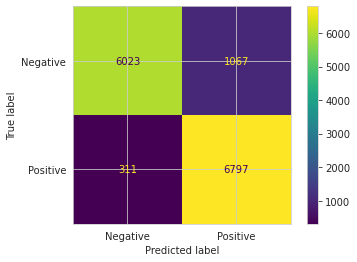

In [ ]:
from sklearn import metrics
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
metrics.plot_confusion_matrix(clf2, X_test, y_test, display_labels=['Negative', 'Positive'])

XGBoost

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 1080x648 with 0 Axes>

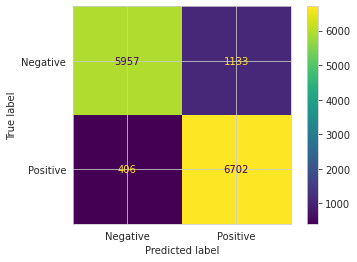

In [ ]:
from sklearn import metrics
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
metrics.plot_confusion_matrix(clf_xgb2, X_test, y_test, display_labels=['Negative', 'Positive'])

Finalmente analizamos la curva AUC - ROC de cada modelo

Random Forest

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = clf2.predict_proba(X_test)[:,1]
y_score1

array([0.54018488, 0.90529897, 0.97242956, ..., 0.84858315, 0.85213284,
       0.36558167])

In [ ]:
clf2.predict_proba(X_test)

array([[0.45981512, 0.54018488],
       [0.09470103, 0.90529897],
       [0.02757044, 0.97242956],
       ...,
       [0.15141685, 0.84858315],
       [0.14786716, 0.85213284],
       [0.63441833, 0.36558167]])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [ ]:
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score1))

roc_auc_score for RandomForest:  0.9626940045702294


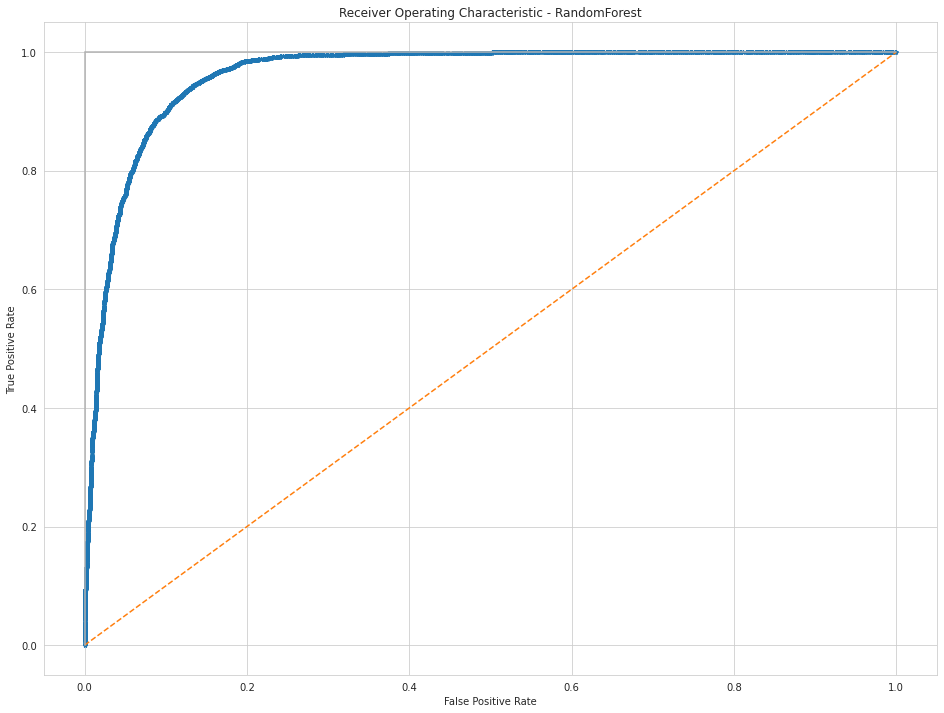

In [ ]:
plt.subplots(1, figsize=(16,12))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost

In [ ]:
y_score2 = clf_xgb2.predict_proba(X_test)[:,1]
y_score2

array([0.5881454 , 0.6240118 , 0.6401738 , ..., 0.64068896, 0.64845896,
       0.37835538], dtype=float32)

In [ ]:
 clf_xgb2.predict_proba(X_test)

array([[0.41185462, 0.5881454 ],
       [0.3759882 , 0.6240118 ],
       [0.3598262 , 0.6401738 ],
       ...,
       [0.35931104, 0.64068896],
       [0.35154104, 0.64845896],
       [0.6216446 , 0.37835538]], dtype=float32)

In [ ]:
# Calculo de tasas 
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [ ]:
print('roc_auc_score for XGBoot: ', roc_auc_score(y_test, y_score2))

roc_auc_score for XGBoot:  0.9490654761952005


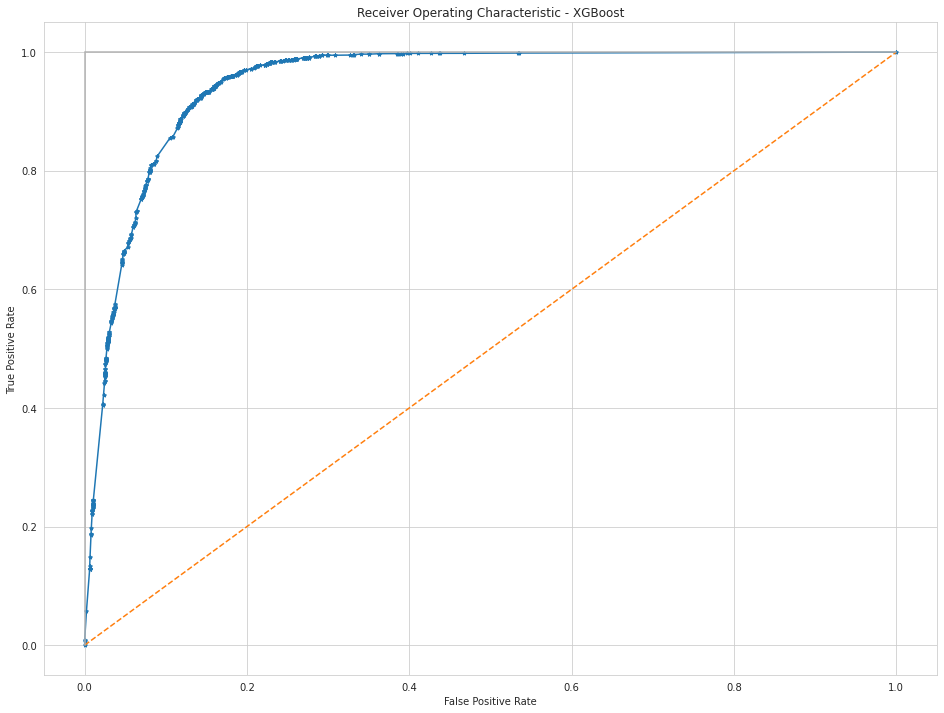

In [ ]:
plt.subplots(1, figsize=(16,12))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate2, true_positive_rate2,marker='*', markersize=4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###CONCLUSIONES

Hemos cumplido el objetivo planteado inicialmente de predecir el comportamiento de los clientes en cuanto a la adhesión o no a un plazo fijo, mediante la utilización de algoritmos de clasifiación.

El Random Forest fue el algoritmo que consiguió el mayor valor de área bajo la curva roc (96,26%), métrica que se eligió como objetivo para
seleccionar el modelo que mejor puede predecir si un cliente es propenso a la adhesión a un plazo fijo.

El Radom Forest nos ofrece un Accuracy (rendimiento) de un 90% en cuanto a la clasificación de los resultados por lo que podríamos decir que es un algoritmo confiable. Aun así entendemos que podríamos seguir mejorando nuestro dataset para conseguir una fiabilidad mayor. Todo esto con más limpieza de los datos e ingeniería de atributos.

La precisión es del 95% para detectar clientes que no son propensos a la adhesión a un plazo fijo y del 86% para aquellos que si lo son.

La sensibilidad es de un 96%, buen valor como para decir que el modelo detecta a las personas propensas a suscribirse a un plazo fijo. 


La especificidad arroja un 85%, podríamos considerar que el modelo también es bueno en detectar las personas adversas a la suscripción a un plazo fijo.

La métrica F1Score (balance entre especificidad y sensibiidad) de 91% también da bastante buena.

Finalmente entendemos que se podría seguir mejorando nuestro dataset y volver a entrenar el modelo.